In [36]:
#Preparing all libraries
import matplotlib.pyplot as plt
import numpy as np

In [37]:
######All Fixed parameters for code
#Parameters held constant
T11 = 600
T12 = 1200
c1 = 0.4
c2 = 0.6 
T21 = 40
T22 = 100

true_params = np.array([T11, T12, c1, c2, T21, T22])

SNR_value = 25

multi_starts_BIC = 5

#Building the TE array - this should be a uniform array
nTE = 64
dTE = 8

TE_DATA = np.linspace(dTE, dTE*nTE, nTE) #ms units

TI_DATA = np.append(0,np.logspace(1,np.log10(3*T12),11))//1

In [38]:
def S_biX_6p(TE, T11, T12, c1, c2, T21, T22, TI = 0):
    exp1 = c1*(1-2*np.exp(-TI/T11))*np.exp(-TE/T21)
    exp2 = c2*(1-2*np.exp(-TI/T12))*np.exp(-TE/T22)
    return exp1 + exp2

#All curves get noise according to this equation
def add_noise(data, SNR):
    #returns a noised vector of data using the SNR given
    sigma = (c1+c2)/SNR #np.max(np.abs(data))/SNR
    noise = np.random.normal(0,sigma,data.shape)
    noised_data = data + noise
    return noised_data

In [39]:
all_data = np.zeros((TI_DATA.shape[0], TE_DATA.shape[0]))

for iTI in range(TI_DATA.shape[0]):
    all_data[iTI,:] = S_biX_6p(TE_DATA, *true_params, TI = TI_DATA[iTI])

noised_data = add_noise(all_data, SNR_value)

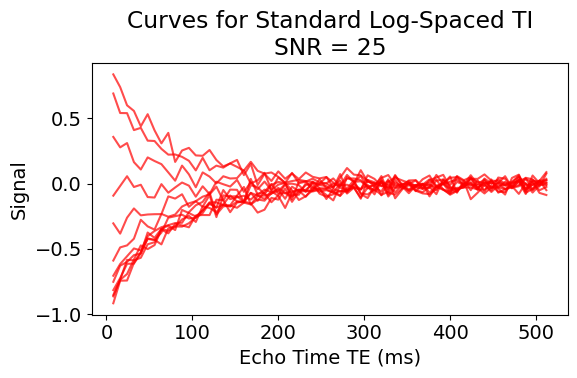

In [40]:
plt.rc('font', size = 14)
fig, ax = plt.subplots(1,1, figsize=(6,4), tight_layout=True)
# fig.suptitle(f'Noised Curves - spaced {TI_blurb}')

for iTI in range(TI_DATA.shape[0]):
    ax.plot(TE_DATA, noised_data[iTI,:], alpha = 0.7, color = 'r')

ax.set_xlabel('Echo Time TE (ms)')
ax.set_ylabel('Signal')
ax.set_title(f'Curves for Standard Log-Spaced TI\nSNR = {SNR_value}')
# ax.plot(TE_DATA, nullpoint_curve1, alpha = 0.7, color = 'k', ls = '--', lw = 2)
# ax.plot(TE_DATA, nullpoint_curve2, alpha = 0.7, color = 'k', ls = ':', lw = 3)

plt.show()